# problem statement 

we have to create the model which effectively detect that people has lungs cancer or not so detecting the cancer in early state will helpful  

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# importing the dataset 
df = pd.read_csv("survey_lung_cancer.csv")

In [3]:
#printing the first five element of data set 
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


smoking 
1 = no 2 = yes

yellow_fingers 
1 = no 2 = yes

anxiety 
1 = no 2 = yes 

peer pressue 
1 = no 2 = yes 

chronic disease 
1 = no  2 = yes 

similarly for all other columns of a data set 

In [4]:
# printing the columsn 
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
#printing unique value in the Gender 
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [6]:
df['AGE'].unique()

array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
       21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
       79, 38, 39, 87, 46], dtype=int64)

In [7]:
# checking all the unique value of a columns 
for col in df.columns:
    unique_value = df[col].unique()
    print(col)
    print(unique_value)

GENDER
['M' 'F']
AGE
[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING
[1 2]
YELLOW_FINGERS
[2 1]
ANXIETY
[2 1]
PEER_PRESSURE
[1 2]
CHRONIC DISEASE
[1 2]
FATIGUE 
[2 1]
ALLERGY 
[1 2]
WHEEZING
[2 1]
ALCOHOL CONSUMING
[2 1]
COUGHING
[2 1]
SHORTNESS OF BREATH
[2 1]
SWALLOWING DIFFICULTY
[2 1]
CHEST PAIN
[2 1]
LUNG_CANCER
['YES' 'NO']


In [8]:
df.shape

(309, 16)

so we have 309 rows and 16 columns 

In [9]:
gender_lungcancer = df.groupby(['GENDER', 'LUNG_CANCER']).size().reset_index(name='Count')

In [10]:
gender_lungcancer

,GENDER,LUNG_CANCER,Count
0,F,NO,22
1,F,YES,125
2,M,NO,17
3,M,YES,145


In [11]:
gender_lungcancer_pivot_table = gender_lungcancer.pivot(index='GENDER', columns='LUNG_CANCER', values='Count')

In [12]:
gender_lungcancer_pivot_table

LUNG_CANCER,NO,YES
GENDER,,
F,22,125
M,17,145


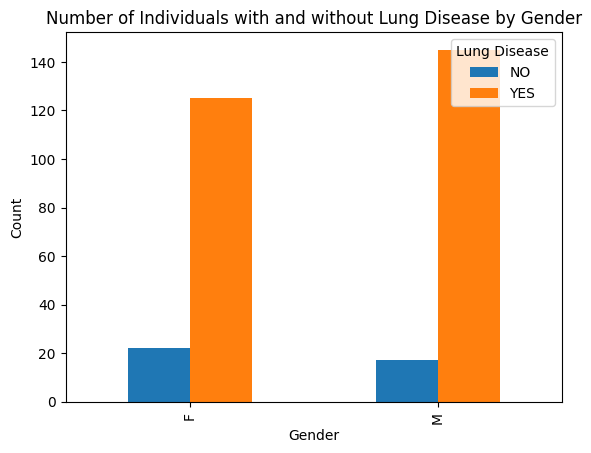

In [13]:
gender_lungcancer_pivot_table.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Individuals with and without Lung Disease by Gender')
plt.legend(title='Lung Disease', loc='upper right')
plt.show()

In [14]:
chronic_smoking_cancer = df.groupby(['CHRONIC DISEASE','SMOKING', 'LUNG_CANCER']).size().reset_index(name='Count')

In [15]:
chronic_smoking_cancer

,CHRONIC DISEASE,SMOKING,LUNG_CANCER,Count
0,1,1,NO,11
1,1,1,YES,45
2,1,2,NO,14
3,1,2,YES,83
4,2,1,NO,9
5,2,1,YES,70
6,2,2,NO,5
7,2,2,YES,72


In [16]:
smoking_cancer = df.groupby(['SMOKING', 'LUNG_CANCER']).size().reset_index(name='Count')

In [17]:
smoking_cancer

,SMOKING,LUNG_CANCER,Count
0,1,NO,20
1,1,YES,115
2,2,NO,19
3,2,YES,155


In [18]:
chronic_cancer = df.groupby(['CHRONIC DISEASE', 'LUNG_CANCER']).size().reset_index(name='Count')

In [19]:
chronic_cancer

,CHRONIC DISEASE,LUNG_CANCER,Count
0,1,NO,25
1,1,YES,128
2,2,NO,14
3,2,YES,142


In [20]:
alcohol_cancer = df.groupby(['ALCOHOL CONSUMING', 'LUNG_CANCER']).size().reset_index(name='Count')

In [21]:
alcohol_cancer

,ALCOHOL CONSUMING,LUNG_CANCER,Count
0,1,NO,32
1,1,YES,105
2,2,NO,7
3,2,YES,165


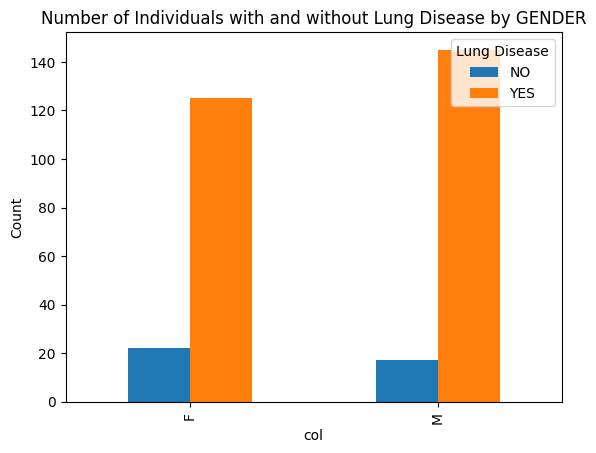

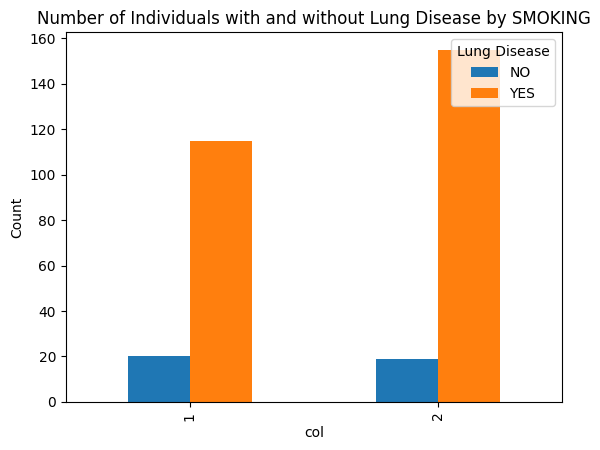

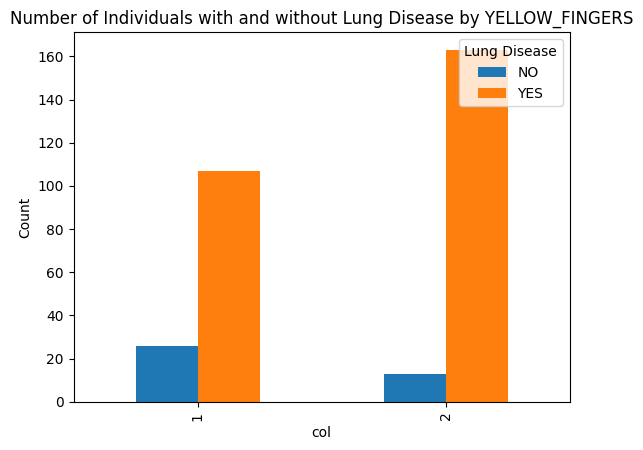

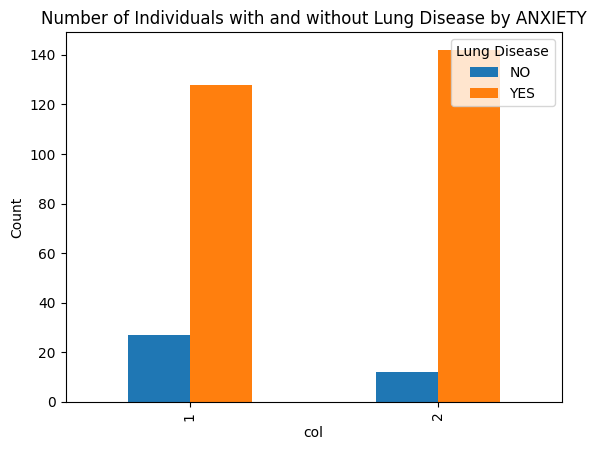

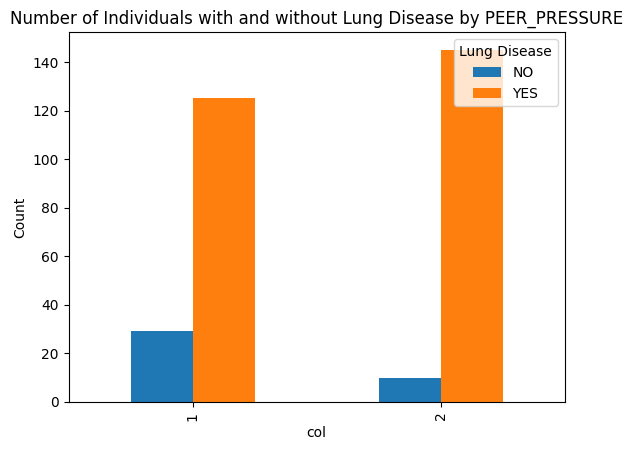

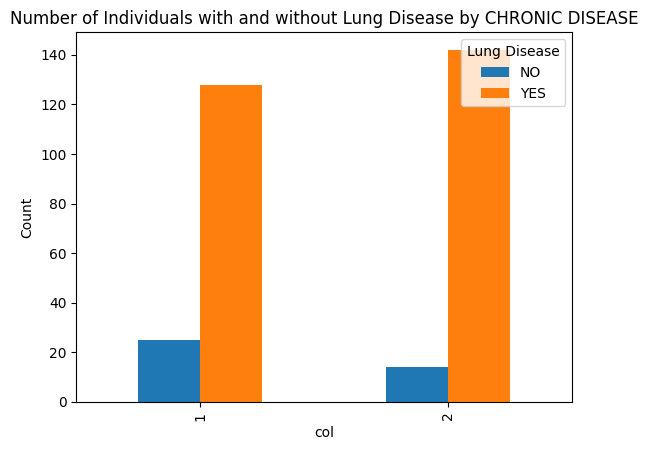

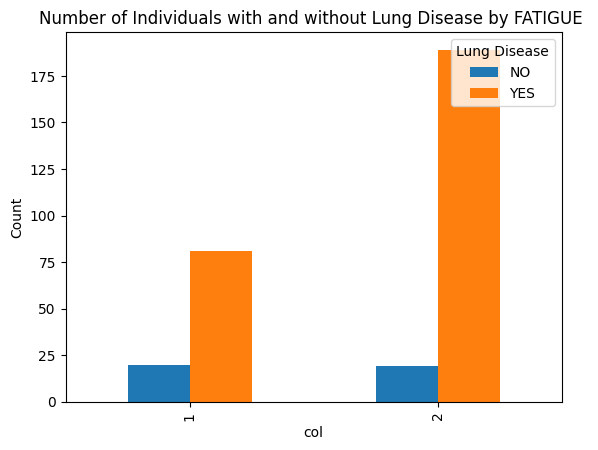

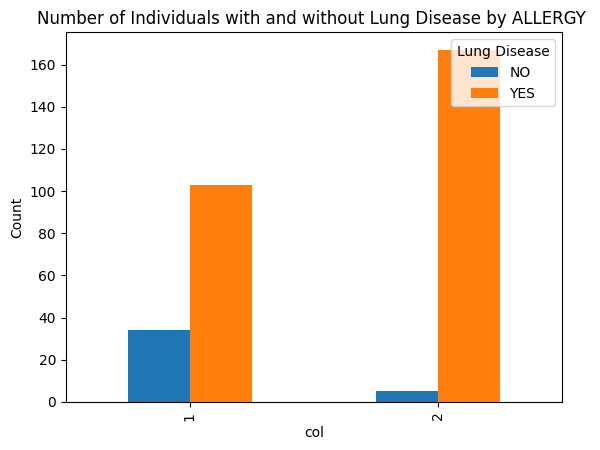

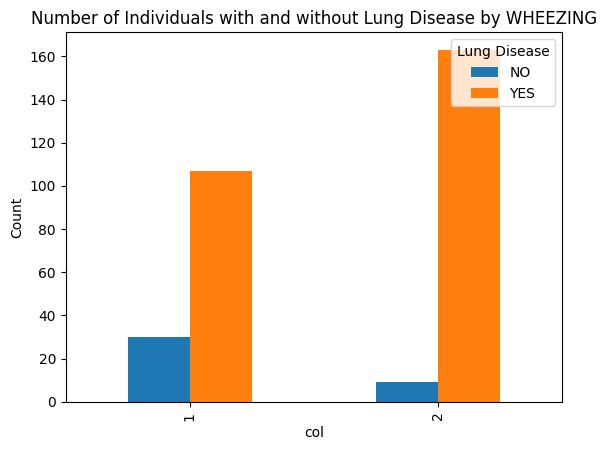

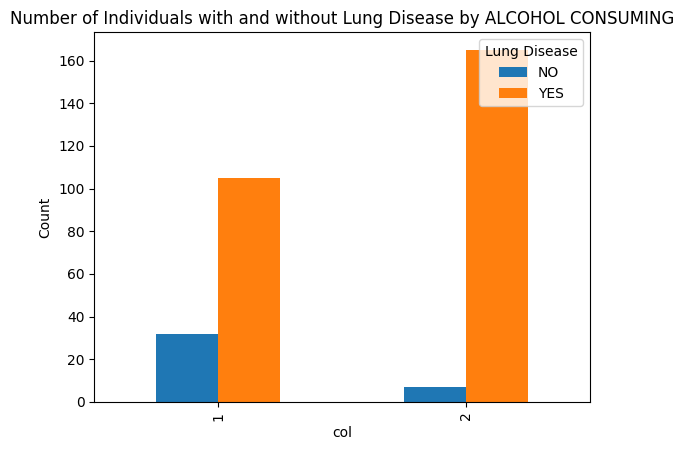

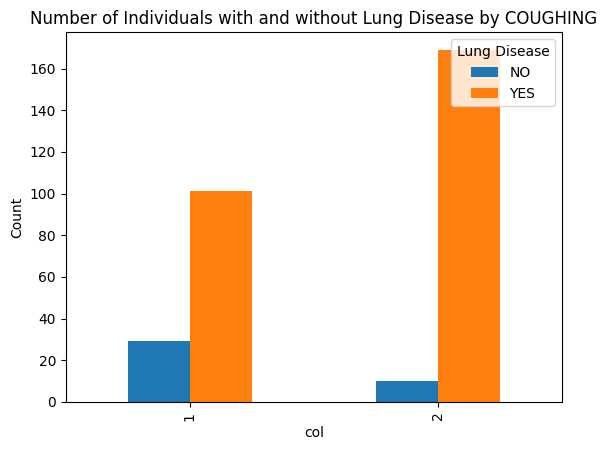

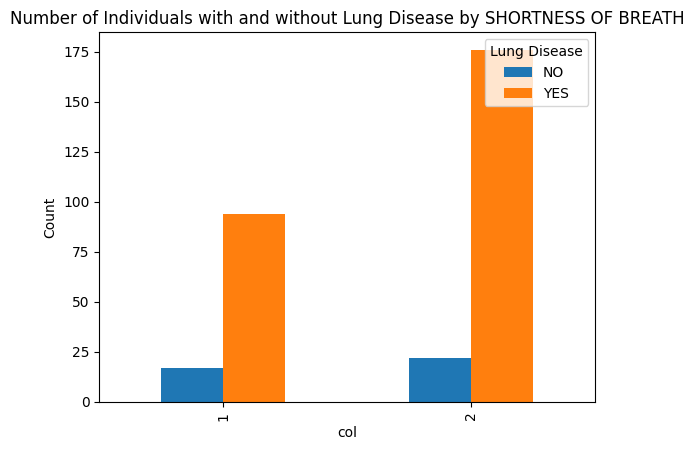

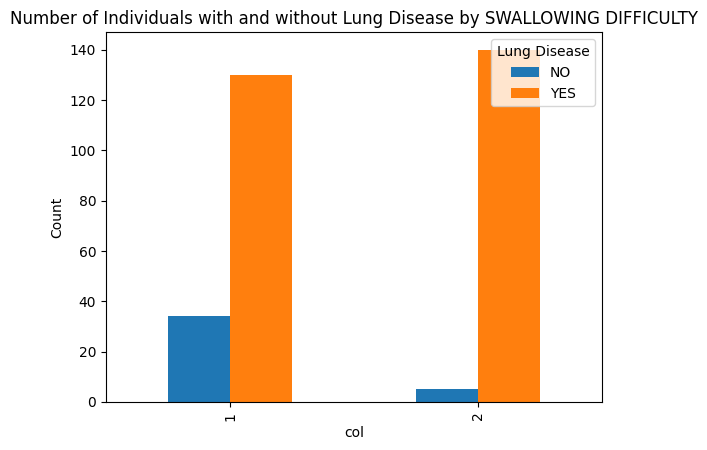

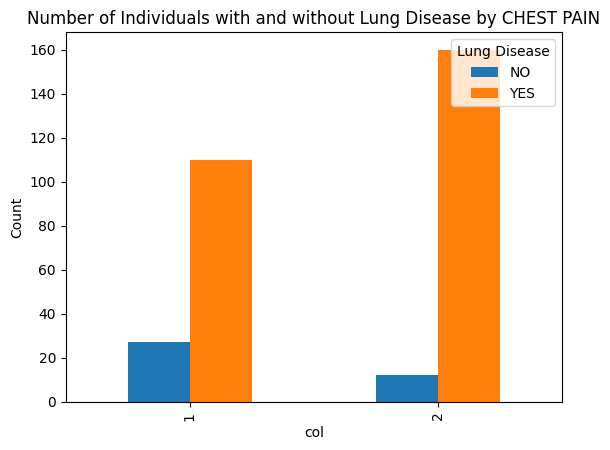

In [22]:
for col in df.columns:
    if col != 'LUNG_CANCER'and col != 'AGE':
        var = df.groupby([col, 'LUNG_CANCER']).size().reset_index(name='Count')
        var1 = var.pivot(index=col, columns='LUNG_CANCER', values='Count')
        var1.plot(kind='bar')
        plt.xlabel('col')
        plt.ylabel('Count')
        plt.title(f'Number of Individuals with and without Lung Disease by {col}')
        plt.legend(title='Lung Disease', loc='upper right')
        plt.show()
        

In [23]:
from sklearn.decomposition import  PCA

In [24]:
df.columns.size

16

In [25]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [26]:
# we have to convert gender into numeric data that is 0 and 1 for pca analysis and further training 
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [28]:
df.head

<bound method NDFrame.head of      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  

In [29]:
pca_1 = PCA(n_components=3)


In [30]:
df_pca = df.drop(columns=['LUNG_CANCER'])

In [31]:
df_pca

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [32]:
pca_1.fit(df_pca)

PCA(n_components=3)

In [33]:
pca_1.explained_variance_ratio_

array([0.95172303, 0.0099867 , 0.00658596])

In [34]:
x_pca_1 = pca_1.transform(df_pca)

In [35]:
x_pca_1

array([[-6.33720315e+00, -2.37894629e-01,  3.75423633e-01],
       [-1.13117657e+01, -2.92313102e-01, -1.64382715e-01],
       [ 3.66916513e+00, -3.82823605e-01, -1.00552161e+00],
       [-3.19252492e-01,  4.97454181e-01,  1.19335013e+00],
       [-3.30025891e-01,  2.87404143e-02, -9.35883171e-01],
       [-1.23306288e+01, -1.76490016e-01, -1.07316839e+00],
       [ 1.06699126e+01, -1.34646386e+00, -2.91646075e-01],
       [ 1.16809527e+01,  1.20470164e+00, -2.97735178e-01],
       [-5.31547880e+00,  6.59961153e-01, -7.76153816e-01],
       [ 9.67779152e+00,  6.08366450e-01,  1.58271569e+00],
       [ 1.67068311e+00,  1.07766972e+00, -4.71769534e-01],
       [-9.33439445e+00, -1.47471508e+00, -1.37742782e-01],
       [ 2.68807811e+00,  9.40808960e-02, -1.41568021e+00],
       [ 4.66872814e+00, -1.57604020e+00, -8.08351698e-02],
       [-6.33060038e+00, -1.32157311e+00,  6.70993803e-01],
       [ 1.46626901e+01,  7.36771917e-01, -2.79871004e-01],
       [-1.23282700e+01, -1.33710931e+00

In [36]:
x_pca_1.size

927

In [37]:
x_pca_1.shape

(309, 3)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x = df.drop(columns=['LUNG_CANCER'])

In [40]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [41]:
y = df['LUNG_CANCER']

In [42]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [44]:
X_train.shape

(247, 15)

In [45]:
y_train.shape

(247,)

In [46]:
X_test.shape

(62, 15)

In [47]:
y_test.shape

(62,)

In [48]:
from tensorflow.keras.models import Sequential

In [49]:
from tensorflow.keras.layers import Dense

In [50]:
from keras.losses import binary_crossentropy

In [51]:
model = Sequential([
    tf.keras.Input(shape =(15,),),
    Dense(units = 25,activation = 'relu'),
    Dense(units = 15,activation = 'relu'),
    Dense(units = 1 , activation = 'linear')
]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                400       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 806 (3.15 KB)
Trainable params: 806 (3.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
import keras

In [53]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)


In [54]:
y_train.unique

<bound method Series.unique of 1      1
282    0
10     1
213    1
54     1
      ..
66     1
53     1
79     1
280    0
8      0
Name: LUNG_CANCER, Length: 247, dtype: int32>

In [55]:
history = model.fit(
    X_train.values,y_train.values,
    epochs=40
)

Epoch 1/40
8/8 [==============================] - 2s 9ms/step - loss: 5.7240
Epoch 2/40
8/8 [==============================] - 0s 7ms/step - loss: 2.9541
Epoch 3/40
8/8 [==============================] - 0s 7ms/step - loss: 0.8495
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3822
Epoch 5/40
8/8 [==============================] - 0s 7ms/step - loss: 0.4373
Epoch 6/40
8/8 [==============================] - 0s 7ms/step - loss: 0.4504
Epoch 7/40
8/8 [==============================] - 0s 7ms/step - loss: 0.4290
Epoch 8/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3988
Epoch 9/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3754
Epoch 10/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3682
Epoch 11/40
8/8 [==============================] - 0s 6ms/step - loss: 0.3690
Epoch 12/40
8/8 [==============================] - 0s 7ms/step - loss: 0.3687
Epoch 13/40
8/8 [==============================] - 0s 3ms/step - loss: 0.

In [56]:
y_pred_neural  = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [57]:
y_pred_neural

array([[2.1980093],
       [1.634169 ],
       [2.4358535],
       [1.5211118],
       [2.026838 ],
       [1.9770254],
       [2.234194 ],
       [2.34812  ],
       [1.3187046],
       [1.3469853],
       [2.6476982],
       [1.64302  ],
       [2.122747 ],
       [2.2570717],
       [2.4405737],
       [2.089429 ],
       [1.209179 ],
       [1.7759153],
       [2.322659 ],
       [2.0996718],
       [2.451903 ],
       [2.1815898],
       [2.0022724],
       [2.7849214],
       [1.9835552],
       [2.4837832],
       [2.3030481],
       [2.086813 ],
       [1.4402895],
       [2.2609668],
       [2.4837039],
       [1.2065233],
       [2.2633684],
       [2.3944786],
       [2.675374 ],
       [1.2463518],
       [2.2442782],
       [1.9867536],
       [1.9886249],
       [1.9766057],
       [1.6772281],
       [1.9645658],
       [1.6789999],
       [2.0557652],
       [2.6258037],
       [1.6741973],
       [1.8352557],
       [2.1741421],
       [2.0703084],
       [2.6532378],


In [58]:
y_pred_final = []
for i in y_pred_neural:
    if(i > 1.5):
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [59]:
y_pred_final

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [60]:
y_test.unique()

array([1, 0])

In [61]:
yes_count = 0
no_count = 0
for num1, num2 in zip(y_test, y_pred_final):
        if num1 == num2:
            yes_count += 1
        else:
            no_count += 1

In [62]:
yes_count

54

In [63]:
no_count

8

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [65]:

# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 score: 0.9285714285714286


In [66]:
from xgboost import  XGBClassifier

In [67]:
xg = XGBClassifier()

In [68]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
xg.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
xg.score(X_test,y_test)

0.9354838709677419

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
y_pred = xg.predict(X_test)

In [73]:
cm = confusion_matrix(y_test, y_pred)

In [74]:
cm

array([[ 3,  3],
       [ 1, 55]], dtype=int64)

In [75]:
import seaborn as sn

Text(50.722222222222214, 0.5, 'y_pred')

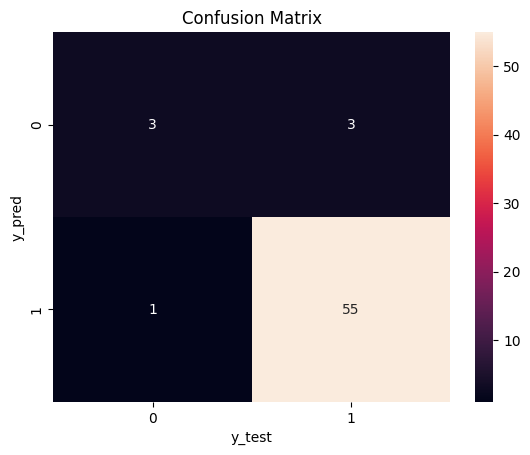

In [76]:
sn.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('y_test')
plt.ylabel('y_pred')